In [96]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import numpy as np

In [97]:
def json_to_numpy(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
        return np.array(list(data.values()))
    
def plot_pred_accuracy(file_list):

    crosswalk_250k_data = json_to_numpy(file_list[0])
    crosswalk_500K_data = json_to_numpy(file_list[1])
    crosswalk_750K_data = json_to_numpy(file_list[2])
    crosswalk_1m_data = json_to_numpy(file_list[3])

    fps = int(file_list[0].split('_')[2])
    cur_frame = fps
    sec = 1

    accuracy_250k = []
    accuracy_500k = []
    accuracy_750k = []
    accuracy_1m = []
    x = []

    while cur_frame < len(crosswalk_250k_data):
        accuracy_250k.append( crosswalk_250k_data[:cur_frame].mean() )
        accuracy_500k.append( crosswalk_500K_data[:cur_frame].mean() )
        accuracy_750k.append( crosswalk_750K_data[:cur_frame].mean() )
        accuracy_1m.append( crosswalk_1m_data[:cur_frame].mean() )

        x.append(sec)

        cur_frame += fps
        sec += 1

    plt.plot(x, accuracy_250k, 'bo-', label='250K')
    plt.plot(x, accuracy_500k, 'gh-', label='500K')
    plt.plot(x, accuracy_750k, 'rs-', label='750K')
    plt.plot(x, accuracy_1m, '>-', label='1m', color='orange')

    # Add labels and title
    plt.xlabel('Seconds')
    plt.ylabel('IoU')
    plt.title(f'Average Accuracy Over Time ({fps} fps)')

    # Add a legend
    plt.legend(title='Bitrate')

    # Add grid
    plt.grid(True)

    # Display the plot
    plt.show()

In [98]:
def plot_pred_accuracy2(file_list, label_list, title):

    driving_1m_data = json_to_numpy(file_list[0])
    driving_3m_data = json_to_numpy(file_list[1])
    driving_5m_data = json_to_numpy(file_list[2])

    fps = int(file_list[0].split('_')[2])
    cur_frame = fps
    sec = 1

    accuracy_1m = []
    accuracy_3m = []
    accuracy_5m = []
    x = []

    while cur_frame < len(driving_1m_data):
        accuracy_1m.append( driving_1m_data[:cur_frame].mean() )
        accuracy_3m.append( driving_3m_data[:cur_frame].mean() )
        accuracy_5m.append( driving_5m_data[:cur_frame].mean() )

        x.append(sec)

        cur_frame += 30
        sec += 1

    plt.plot(x, accuracy_1m, 'bo-', label=label_list[0])
    plt.plot(x, accuracy_3m, 'gh-', label=label_list[1])
    plt.plot(x, accuracy_5m, 'rs-', label=label_list[2])

    # Add labels and title
    plt.xlabel('Seconds')
    plt.ylabel('IoU')
    plt.title(title)

    # Add a legend
    plt.legend(title='Bitrate')

    # Add grid
    plt.grid(True)

    # Display the plot
    plt.show()

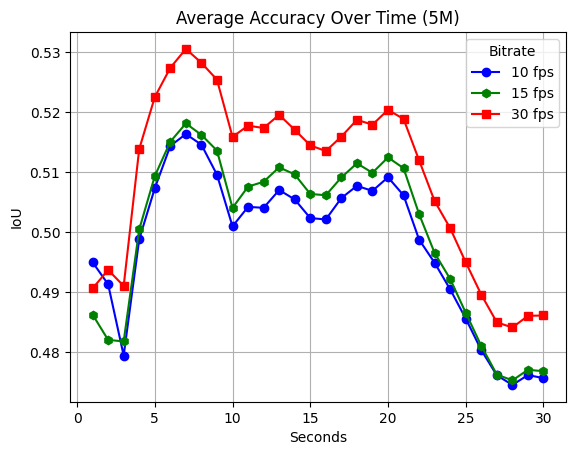

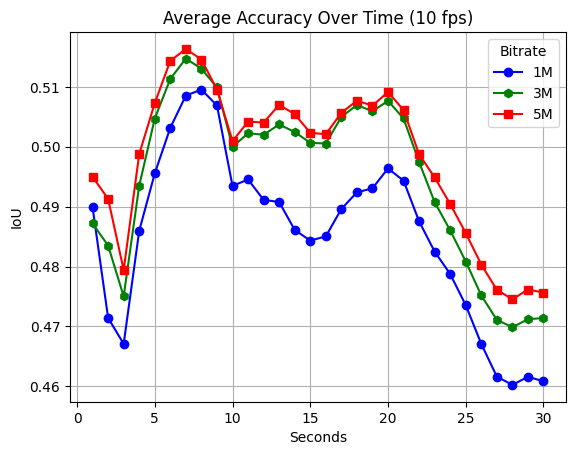

In [99]:
files = [
    'out-data/nydriving_5M_10_iou.json',
    'out-data/nydriving_5M_15_iou.json',
    'out-data/nydriving_5M_30_iou.json',
]
labels = ['10 fps', '15 fps', '30 fps']
plot_pred_accuracy2(files, labels, title='Average Accuracy Over Time (5M)')

files = [
    'out-data/nydriving_1M_10_iou.json',
    'out-data/nydriving_3M_10_iou.json',
    'out-data/nydriving_5M_10_iou.json',
]
labels = ['1M', '3M', '5M']
plot_pred_accuracy2(files, labels, title='Average Accuracy Over Time (10 fps)')

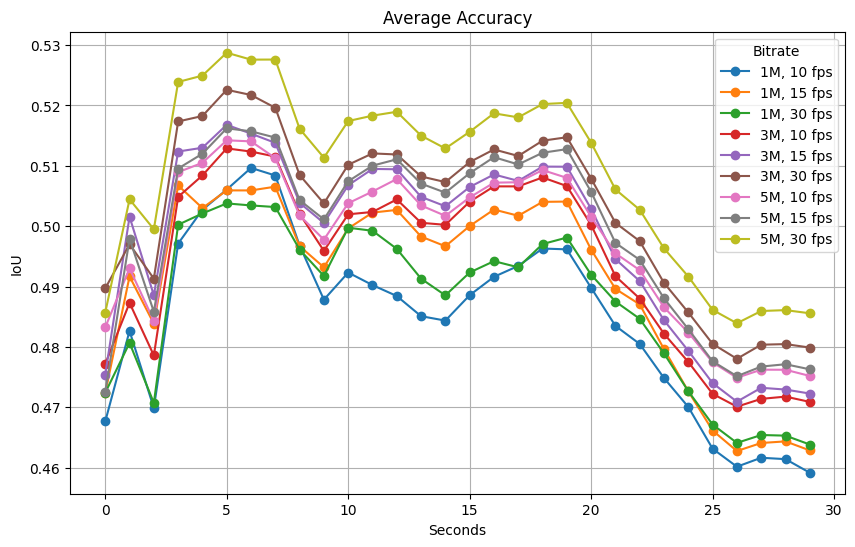

In [100]:
# Plot all
plt.figure(figsize=(10, 6))


labels = np.array([])
data = np.array([])
for video in sorted(os.listdir('out-data')):
    name = video.split('_')
    labels = np.append(labels, f'{name[1]}, {name[2]} fps')
    if data.size:
        data = np.vstack([data, json_to_numpy(os.path.join('out-data', video))])
    else:
        data = json_to_numpy(os.path.join('out-data', video))

for i, exp in enumerate(data):
    cur_frame = 30
    data_averaged = np.array([])

    while cur_frame < exp.shape[0]:
        data_averaged = np.append(data_averaged, exp[:cur_frame].mean())

        cur_frame += 30
    
    data_averaged = np.append(data_averaged, exp.mean())

    x = np.array(range(cur_frame // 30))

    plt.plot(x, data_averaged, 'o-', label=labels[i])

# Add labels and title
plt.xlabel('Seconds')
plt.ylabel('IoU')
plt.title('Average Accuracy')
plt.legend(title='Bitrate')
plt.grid(True)
plt.show()

In [101]:
files = [
    'crosswalk_250K_30_iou.json',
    'crosswalk_500K_30_iou.json',
    'crosswalk_750K_30_iou.json',
    'crosswalk_1m_30_iou.json'
]
plot_pred_accuracy(files)

FileNotFoundError: [Errno 2] No such file or directory: 'crosswalk_250K_30_iou.json'

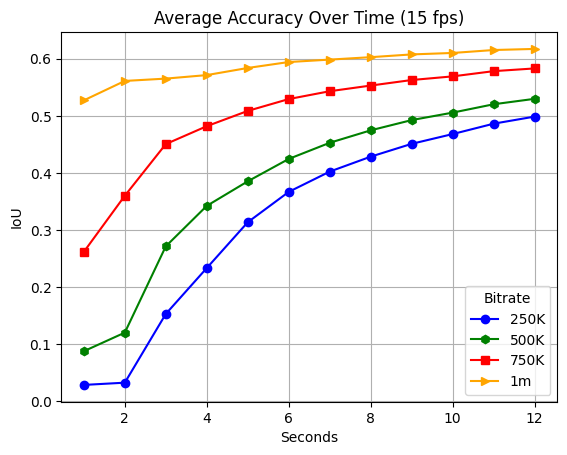

In [ ]:
files = [
    'crosswalk_250K_15_iou.json',
    'crosswalk_500K_15_iou.json',
    'crosswalk_750K_15_iou.json',
    'crosswalk_1m_15_iou.json'
]
plot_pred_accuracy(files)

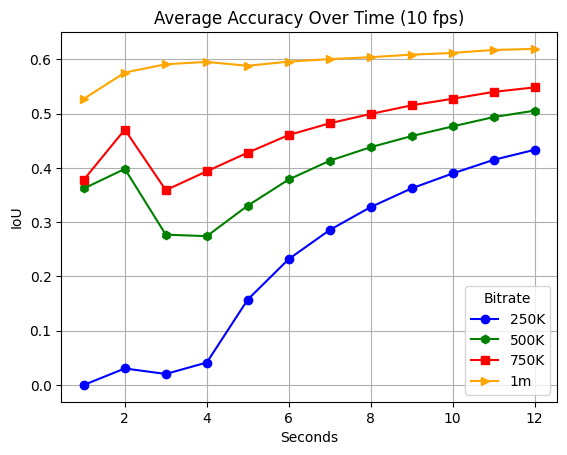

In [ ]:
files = [
    'crosswalk_250K_10_iou.json',
    'crosswalk_500K_10_iou.json',
    'crosswalk_750K_10_iou.json',
    'crosswalk_1m_10_iou.json'
]
plot_pred_accuracy(files)